# Sesión 06 - Manejo de Modelos de Clasificación para entornos operativos

*Objetivo*

- Aplicar algoritmos de clasificación para identificar eventos operacionales críticos en la industria petrolera.
- Evaluar el rendimiento de diferentes clasificadores.
- Interpretar los resultados y la matriz de confusión.
- Analizar la eficiencia en pozos productores.

In [98]:
!python --version


Python 3.12.1


## 0. Carga de Librerías

In [99]:
# Instalación de dependencias del nuevo codespace
# !pip install -r ../requirements.txt

In [100]:
# Importación de Librerías

# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Librerías para Visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de Clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Modelos de Regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## 1. Carga de Datos

In [101]:
# Carga desde la carpeta data/raw/

# Ruta relativa
# pd.read_csv("../data/raw/Operational_events.csv")

# Ruta absoluta
df = pd.read_csv("/workspaces/ER-ml-bootcamp-labs/data/raw/Operational_events.csv")



## 2. EDA (Medidas de Tendencia Central, Análisis de Nulos)

In [102]:
# Métodos info(), describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well_ID               475 non-null    float64
 1   Date                  475 non-null    object 
 2   Time                  475 non-null    object 
 3   Pressure              475 non-null    float64
 4   Temperature           475 non-null    float64
 5   Flow_Rate             475 non-null    float64
 6   Pump_Speed            475 non-null    float64
 7   Gas_Oil_Ratio         475 non-null    float64
 8   Water_Cut             475 non-null    float64
 9   Vibration             475 non-null    float64
 10  Event_Type            500 non-null    object 
 11  Maintenance_Required  475 non-null    float64
 12  Downtime              475 non-null    float64
dtypes: float64(10), object(3)
memory usage: 50.9+ KB


In [103]:
df.describe()

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,10.362105,2960.284279,202.865593,490.951223,1474.688338,826.067573,0.517296,4.767155,0.193684,9.716888
std,5.803338,1169.230972,56.146715,285.666948,855.630251,371.162601,0.293007,2.825830,0.395601,25.604104
min,1.000000,1001.771126,100.270725,0.011635,3.088440,204.183743,0.001992,0.031409,0.000000,0.000000
25%,5.000000,1920.023988,153.730480,253.453970,692.447336,496.807440,0.275245,2.228550,0.000000,0.000000
50%,10.000000,3021.461026,204.310197,486.173654,1537.964259,825.174981,0.519032,4.809060,0.000000,0.000000
75%,15.000000,3966.937400,251.558604,729.514778,2177.116863,1136.238405,0.756875,7.076513,0.000000,0.000000
max,20.000000,4990.997556,299.361836,995.734452,2999.141412,1495.535353,0.997518,9.966969,1.000000,152.279829


In [104]:
df.loc[df.Date.isnull()]

,Well_ID,Date,Time,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Event_Type,Maintenance_Required,Downtime
17,9.0,NaN,02:18:47,4386.644569,NaN,404.508127,2663.310296,1306.206983,0.935635,7.853407,Normal,0.0,0.000000
69,4.0,NaN,23:36:07,3605.468844,254.249334,374.435370,206.764618,300.517385,0.104247,8.404396,Blockage,1.0,15.859890
70,5.0,NaN,13:35:53,4349.963156,166.429283,311.444264,682.186863,990.262712,0.379306,7.442497,Normal,0.0,0.000000
75,1.0,NaN,22:38:02,2493.237265,154.148935,643.999543,1226.202513,233.002262,0.156153,7.159722,Normal,0.0,0.000000
98,18.0,NaN,15:12:27,1304.523438,270.241383,495.146527,1441.759732,970.130120,0.824681,3.478092,Normal,0.0,0.000000
127,9.0,NaN,08:24:47,4009.711050,118.096339,288.685596,327.328895,1045.665142,0.765191,9.256748,Normal,0.0,0.000000
149,11.0,NaN,01:59:22,1608.099413,112.269925,780.761586,1379.401271,275.612934,0.994866,0.577806,Normal,0.0,0.000000
158,8.0,NaN,09:37:46,1328.686670,NaN,295.444777,2307.669444,1012.062640,0.381940,2.056873,Normal,0.0,0.000000
163,15.0,NaN,17:30:14,3023.410772,268.140606,NaN,1626.711616,967.451998,0.508361,2.975485,Normal,0.0,0.000000
194,15.0,NaN,05:52:35,NaN,148.378766,12.404036,1406.303896,591.644839,0.598357,2.972378,Normal,0.0,0.000000


<Axes: >

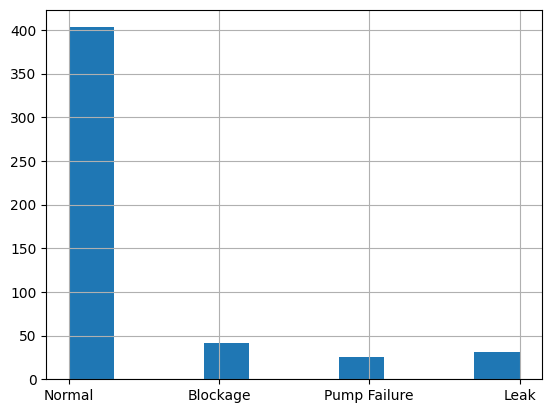

In [105]:
df.Event_Type.hist()

## 3. Transformaciones (Encoding, Imputación)

In [106]:
# Valores faltantes

df.isnull().sum()

Well_ID                 25
Date                    25
Time                    25
Pressure                25
Temperature             25
Flow_Rate               25
Pump_Speed              25
Gas_Oil_Ratio           25
Water_Cut               25
Vibration               25
Event_Type               0
Maintenance_Required    25
Downtime                25
dtype: int64

In [107]:
df.Pressure.describe()

count     475.000000
mean     2960.284279
std      1169.230972
min      1001.771126
25%      1920.023988
50%      3021.461026
75%      3966.937400
max      4990.997556
Name: Pressure, dtype: float64

<Axes: >

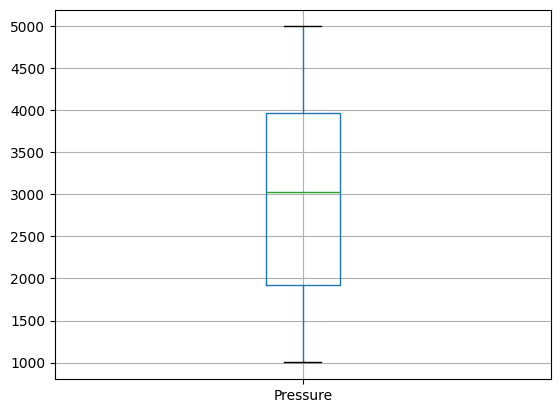

In [108]:
df.Pressure.to_frame().boxplot()

In [109]:
df.Temperature.describe()

count    475.000000
mean     202.865593
std       56.146715
min      100.270725
25%      153.730480
50%      204.310197
75%      251.558604
max      299.361836
Name: Temperature, dtype: float64

<Axes: >

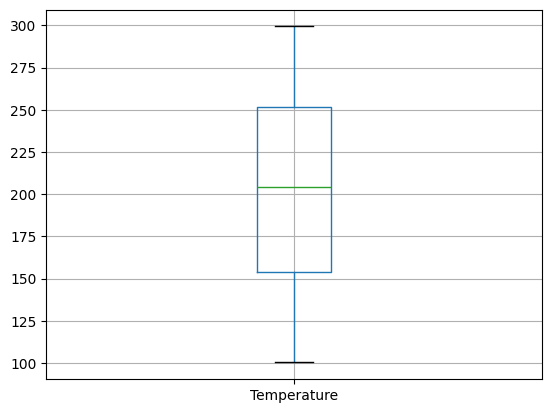

In [110]:
df.Temperature.to_frame().boxplot()

In [111]:
df.describe()

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,10.362105,2960.284279,202.865593,490.951223,1474.688338,826.067573,0.517296,4.767155,0.193684,9.716888
std,5.803338,1169.230972,56.146715,285.666948,855.630251,371.162601,0.293007,2.825830,0.395601,25.604104
min,1.000000,1001.771126,100.270725,0.011635,3.088440,204.183743,0.001992,0.031409,0.000000,0.000000
25%,5.000000,1920.023988,153.730480,253.453970,692.447336,496.807440,0.275245,2.228550,0.000000,0.000000
50%,10.000000,3021.461026,204.310197,486.173654,1537.964259,825.174981,0.519032,4.809060,0.000000,0.000000
75%,15.000000,3966.937400,251.558604,729.514778,2177.116863,1136.238405,0.756875,7.076513,0.000000,0.000000
max,20.000000,4990.997556,299.361836,995.734452,2999.141412,1495.535353,0.997518,9.966969,1.000000,152.279829


<Axes: >

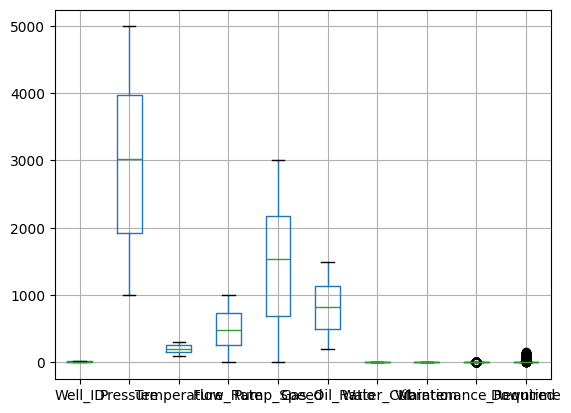

In [112]:
df.boxplot()

In [ ]:
# Imputación Simple
# Cuando se tienen pocas variables podemos completar el valor faltantes con una media de tendencia central, como la media (mean)
df.Temperature.fillna(df.Temperature.mean())
df.Pressure.fillna(df.Temperature.mean())

In [114]:
df.Event_Type.nunique()

4

In [115]:
# Variables categóricas de manera manual, se maneja con diccionarios 
# manual_encode = {
#    "Normal": 0, 
#    "Blockage": 1, 
#    "Leak": 2, 
#    "Pump Failure": 3}
# df.Event_Type.map(manual_encode)

In [116]:
# Librería para Encoding de Variables Categóricas
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder = LabelEncoder()

# Crear una columna de tipo numérica que va a asignar un número con base
df["Event_Type_n"] = label_enconder.fit_transform(df.Event_Type)

df[["Event_Type_n","Event_Type"]].value_counts()

Event_Type_n  Event_Type  
2             Normal          403
0             Blockage         41
1             Leak             31
3             Pump Failure     25
Name: count, dtype: int64

In [118]:
df

,Well_ID,Date,Time,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Event_Type,Maintenance_Required,Downtime,Event_Type_n
0,7.0,2023-12-15,14:42:07,3394.633937,131.203728,155.994520,174.250837,1326.028990,0.601115,7.080726,Normal,0.0,0.000000,2
1,2.0,2023-12-10,11:29:37,1003.115063,298.442312,617.481510,1834.959481,NaN,0.023062,5.247747,Normal,0.0,0.000000,2
2,16.0,2023-09-28,14:50:43,3056.937754,218.482914,46.450413,1822.634556,421.681361,NaN,9.488855,Blockage,1.0,59.737430,0
3,9.0,2023-12-12,20:01:19,1964.101864,236.652704,609.996658,2499.584735,425.374050,0.391061,1.822361,Normal,0.0,0.000000,2
4,6.0,2023-02-23,09:03:53,1125.253170,268.456955,449.754133,1185.450708,1404.656526,0.727272,3.265408,Normal,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.0,2023-11-10,17:22:01,1224.855622,249.504127,850.852757,858.405127,1032.581456,0.314162,9.579711,Normal,0.0,0.000000,2
496,9.0,2023-09-16,13:54:10,1870.915599,224.245306,48.078968,1450.723757,219.041265,0.921144,9.760860,Normal,0.0,0.000000,2
497,8.0,2023-01-16,16:50:53,4580.306237,214.785827,350.777623,2498.081239,841.428711,0.911633,9.280142,Normal,0.0,0.000000,2
498,11.0,2023-04-13,08:41:49,3258.376325,150.464549,915.289940,797.056695,1364.560451,NaN,6.565627,Blockage,1.0,18.799964,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well_ID               475 non-null    float64
 1   Date                  475 non-null    object 
 2   Time                  475 non-null    object 
 3   Pressure              475 non-null    float64
 4   Temperature           475 non-null    float64
 5   Flow_Rate             475 non-null    float64
 6   Pump_Speed            475 non-null    float64
 7   Gas_Oil_Ratio         475 non-null    float64
 8   Water_Cut             475 non-null    float64
 9   Vibration             475 non-null    float64
 10  Event_Type            500 non-null    object 
 11  Maintenance_Required  475 non-null    float64
 12  Downtime              475 non-null    float64
 13  Event_Type_n          500 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 54.8+ KB


In [120]:
# Instrucción para descartar columnas que no sean numéricas 
# Además renombra la columna modificada con el nombre original
df_encoded = df.select_dtypes(exclude=['object']).rename(columns={"Event_Type_n":"Event_Type"})

In [121]:
# Imputación Simple con Librería SimpleImputer

from sklearn.impute import SimpleImputer

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well_ID               475 non-null    float64
 1   Date                  475 non-null    object 
 2   Time                  475 non-null    object 
 3   Pressure              475 non-null    float64
 4   Temperature           475 non-null    float64
 5   Flow_Rate             475 non-null    float64
 6   Pump_Speed            475 non-null    float64
 7   Gas_Oil_Ratio         475 non-null    float64
 8   Water_Cut             475 non-null    float64
 9   Vibration             475 non-null    float64
 10  Event_Type            500 non-null    object 
 11  Maintenance_Required  475 non-null    float64
 12  Downtime              475 non-null    float64
 13  Event_Type_n          500 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 54.8+ KB


In [123]:
# Imputación Simple en acción

imputer = SimpleImputer(strategy="mean")

# df_imputado = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df_imputado = pd.DataFrame(imputer.fit_transform(df_encoded), columns = df_encoded.columns)

In [124]:
df_imputado

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime,Event_Type
0,7.0,3394.633937,131.203728,155.994520,174.250837,1326.028990,0.601115,7.080726,0.0,0.000000,2.0
1,2.0,1003.115063,298.442312,617.481510,1834.959481,826.067573,0.023062,5.247747,0.0,0.000000,2.0
2,16.0,3056.937754,218.482914,46.450413,1822.634556,421.681361,0.517296,9.488855,1.0,59.737430,0.0
3,9.0,1964.101864,236.652704,609.996658,2499.584735,425.374050,0.391061,1.822361,0.0,0.000000,2.0
4,6.0,1125.253170,268.456955,449.754133,1185.450708,1404.656526,0.727272,3.265408,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
495,2.0,1224.855622,249.504127,850.852757,858.405127,1032.581456,0.314162,9.579711,0.0,0.000000,2.0
496,9.0,1870.915599,224.245306,48.078968,1450.723757,219.041265,0.921144,9.760860,0.0,0.000000,2.0
497,8.0,4580.306237,214.785827,350.777623,2498.081239,841.428711,0.911633,9.280142,0.0,0.000000,2.0
498,11.0,3258.376325,150.464549,915.289940,797.056695,1364.560451,0.517296,6.565627,1.0,18.799964,0.0


## 4. Modelamiento

In [125]:
# Carga de librerías para modelos

# Árboles de Decisión - from sklearn.tree import DecisionTreeClassifier
# Vecinos Cercanos - from sklearn.neighbors import KNeighborsClassifier
# Support Vector Classifier - from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [126]:
# Entrenamiento por train test split

X = df_imputado.drop(columns = ["Event_Type"])
y = df_imputado.Event_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 23)

In [127]:
# Entrenamiento del Árbol de Decision

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
# Entrentamiento por KNeighbors

model_knc = KNeighborsClassifier()
model_knc.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
# Entrenamiento por Support Vector

model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

## 5. Evaluación

In [130]:
# Predict por todos los modelos

predict_dtc = model_dtc.predict(X_test)
predict_knc = model_knc.predict(X_test)
predict_svc = model_svc.predict(X_test)

### 5.1 Evaluación DTC

In [131]:
# Evaluación DTC
dtc_accuracy = accuracy_score(y_pred = predict_dtc, y_true = y_test) 
dtc_precision = precision_score(y_pred = predict_dtc, y_true = y_test, average="weighted") 
dtc_recall = recall_score(y_pred = predict_dtc, y_true = y_test, average="weighted") 
dtc_f1 = f1_score(y_pred = predict_dtc, y_true = y_test, average="weighted") 
dtc_cmatrix = confusion_matrix(y_pred = predict_dtc, y_true = y_test)

In [132]:
# Imprimir Evaluación DTC

print(f"dtc_accuracy: {dtc_accuracy}")
print(f"dtc_precision: {dtc_precision}")
print(f"dtc_recall: {dtc_recall}")
print(f"dtc_f1: {dtc_f1}")
print(f"dtc_cmatrix: \n {dtc_cmatrix}")

dtc_accuracy: 0.93
dtc_precision: 0.9433333333333332
dtc_recall: 0.93
dtc_f1: 0.9309999999999999
dtc_cmatrix: 
 [[ 2  2  0  0]
 [ 3  3  0  0]
 [ 0  0 87  0]
 [ 1  1  0  1]]


### 5.2 Evaluación KNC

In [133]:
# Evaluación KNC
knc_accuracy = accuracy_score(y_pred = predict_knc, y_true = y_test) 
knc_precision = precision_score(y_pred = predict_knc, y_true = y_test, average="weighted") 
knc_recall = recall_score(y_pred = predict_knc, y_true = y_test, average="weighted") 
knc_f1 = f1_score(y_pred = predict_knc, y_true = y_test, average="weighted") 
knc_cmatrix = confusion_matrix(y_pred = predict_knc, y_true = y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [134]:
print(f"knc_accuracy: {knc_accuracy}")
print(f"knc_precision: {knc_precision}")
print(f"knc_recall: {knc_recall}")
print(f"knc_f1: {knc_f1}")
print(f"knc_cmatrix: \n {knc_cmatrix}")

knc_accuracy: 0.84
knc_precision: 0.7534020618556702
knc_recall: 0.84
knc_f1: 0.7943478260869564
knc_cmatrix: 
 [[ 0  0  4  0]
 [ 0  0  6  0]
 [ 2  1 84  0]
 [ 0  0  3  0]]


### 5.3 Evaluación SVC

In [135]:
svc_accuracy = accuracy_score(y_pred = predict_svc, y_true = y_test) 
svc_precision = precision_score(y_pred = predict_svc, y_true = y_test, average="weighted") 
svc_recall = recall_score(y_pred = predict_svc, y_true = y_test, average="weighted") 
svc_f1 = f1_score(y_pred = predict_svc, y_true = y_test, average="weighted") 
svc_cmatrix = confusion_matrix(y_pred = predict_svc, y_true = y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [136]:
print(f"svc_accuracy: {svc_accuracy}")
print(f"svc_precision: {svc_precision}")
print(f"svc_recall: {svc_recall}")
print(f"svc_f1: {svc_f1}")
print(f"svc_cmatrix: \n {svc_cmatrix}")

svc_accuracy: 0.87
svc_precision: 0.7569
svc_recall: 0.87
svc_f1: 0.8095187165775402
svc_cmatrix: 
 [[ 0  0  4  0]
 [ 0  0  6  0]
 [ 0  0 87  0]
 [ 0  0  3  0]]


# Dataset Balanceado

In [137]:
df_imputado.Event_Type.value_counts()

Event_Type
2.0    403
0.0     41
1.0     31
3.0     25
Name: count, dtype: int64

In [138]:
# Regla de Balanceo de Clases
# 1.1 * Promedio de clases desbalanceadas
35

35

In [139]:
majority_class_df_sample = df_imputado.loc[df_imputado.Event_Type == 2].sample(35)

In [140]:
minority_class_df_sample = df_imputado.loc[df_imputado.Event_Type != 2]

In [141]:
minority_class_df_sample

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime,Event_Type
2,16.0,3056.937754,218.482914,46.450413,1822.634556,421.681361,0.517296,9.488855,1.0,59.737430,0.0
8,15.0,1943.939679,151.213665,40.433590,2131.988669,344.158067,0.439337,2.017192,1.0,92.453312,3.0
9,4.0,2641.531692,251.110228,228.798165,230.939729,576.676889,0.161221,9.296977,1.0,31.869765,1.0
19,16.0,3170.160922,202.865593,636.332618,751.385456,966.832102,0.978893,4.867422,1.0,35.801239,0.0
30,10.0,4425.959365,231.738726,162.934427,211.706242,1035.145062,0.026511,5.857756,1.0,44.830347,0.0
...,...,...,...,...,...,...,...,...,...,...,...
477,6.0,4200.550331,148.331784,490.951223,950.712413,546.832914,0.505926,7.777279,1.0,145.660428,3.0
481,13.0,1727.054391,200.826568,322.809793,774.322930,803.181043,0.133284,9.277457,1.0,125.897364,3.0
485,7.0,2546.785800,264.228485,969.490899,1361.778409,859.099506,0.572172,9.323481,1.0,48.566562,3.0
489,10.0,3861.289242,153.628646,315.668481,375.753693,1052.162963,0.039797,5.976823,1.0,152.279829,3.0


In [142]:
df_balanced = pd.concat([majority_class_df_sample, minority_class_df_sample])

In [143]:
df_balanced.Event_Type.value_counts()

Event_Type
0.0    41
2.0    35
1.0    31
3.0    25
Name: count, dtype: int64

## 4. Modelamiento sobre el Balanceado

In [144]:
# Entrenamiento por train test split

X = df_balanced.drop(columns = ["Event_Type"])
y = df_balanced.Event_Type

X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, y, train_size = 0.8, random_state = 23)

In [145]:
# Entrenamiento del Árbol de Decision

b_model_dtc = DecisionTreeClassifier()
b_model_dtc.fit(X_trainb,y_trainb)

DecisionTreeClassifier()

In [146]:
# Entrentamiento por KNeighbors

b_model_knc = KNeighborsClassifier()
b_model_knc.fit(X_trainb, y_trainb)

KNeighborsClassifier()

In [147]:
# Entrenamiento por Support Vector

b_model_svc = SVC()
b_model_svc.fit(X_trainb, y_trainb)

SVC()

## 5. Evaluación sobre Balanceado

In [148]:
# Predict por todos los modelos

b_predict_dtc = b_model_dtc.predict(X_testb)
b_predict_knc = b_model_knc.predict(X_testb)
b_predict_svc = b_model_svc.predict(X_testb)

### 5.1 Evaluación DTC Balanceado

In [149]:
b_dtc_accuracy = accuracy_score(y_pred = b_predict_dtc, y_true = y_testb) 
b_dtc_precision = precision_score(y_pred = b_predict_dtc, y_true = y_testb, average="weighted") 
b_dtc_recall = recall_score(y_pred = b_predict_dtc, y_true = y_testb, average="weighted") 
b_dtc_f1 = f1_score(y_pred = b_predict_dtc, y_true = y_testb, average="weighted") 
b_dtc_cmatrix = confusion_matrix(y_pred = b_predict_dtc, y_true = y_testb)

In [150]:
print(f"dtc_accuracy: {b_dtc_accuracy}")
print(f"dtc_precision: {b_dtc_precision}")
print(f"dtc_recall: {b_dtc_recall}")
print(f"dtc_f1: {b_dtc_f1}")
print(f"dtc_cmatrix: \n {b_dtc_cmatrix}")

dtc_accuracy: 0.7407407407407407
dtc_precision: 0.8209876543209877
dtc_recall: 0.7407407407407407
dtc_f1: 0.7449424214130096
dtc_cmatrix: 
 [[ 5  3  0  3]
 [ 1  2  0  0]
 [ 0  0 11  0]
 [ 0  0  0  2]]


### 5.2 Evaluación KNC Balanceado

In [151]:
b_knc_accuracy = accuracy_score(y_pred = b_predict_knc, y_true = y_testb) 
b_knc_precision = precision_score(y_pred = b_predict_knc, y_true = y_testb, average="weighted") 
b_knc_recall = recall_score(y_pred = b_predict_knc, y_true = y_testb, average="weighted") 
b_knc_f1 = f1_score(y_pred = b_predict_knc, y_true = y_testb, average="weighted") 
b_knc_cmatrix = confusion_matrix(y_pred = b_predict_knc, y_true = y_testb)

In [152]:
print(f"knc_accuracy: {b_knc_accuracy}")
print(f"knc_precision: {b_knc_precision}")
print(f"knc_recall: {b_knc_recall}")
print(f"knc_f1: {b_knc_f1}")
print(f"knc_cmatrix: \n {b_knc_cmatrix}")

knc_accuracy: 0.25925925925925924
knc_precision: 0.33274544385655497
knc_recall: 0.25925925925925924
knc_f1: 0.28104575163398693
knc_cmatrix: 
 [[4 2 2 3]
 [1 1 1 0]
 [3 4 2 2]
 [1 0 1 0]]


### 5.3 Evaluación SVC Balanceado

In [153]:
b_svc_accuracy = accuracy_score(y_pred = b_predict_svc, y_true = y_testb) 
b_svc_precision = precision_score(y_pred = b_predict_svc, y_true = y_testb, average="weighted") 
b_svc_recall = recall_score(y_pred = b_predict_svc, y_true = y_testb, average="weighted") 
b_svc_f1 = f1_score(y_pred = b_predict_svc, y_true = y_testb, average="weighted") 
b_svc_cmatrix = confusion_matrix(y_pred = b_predict_svc, y_true = y_testb)

In [154]:
print(f"svc_accuracy: {b_svc_accuracy}")
print(f"svc_precision: {b_svc_precision}")
print(f"svc_recall: {b_svc_recall}")
print(f"svc_f1: {b_svc_f1}")
print(f"svc_cmatrix: \n {b_svc_cmatrix}")

svc_accuracy: 0.2962962962962963
svc_precision: 0.4703703703703703
svc_recall: 0.2962962962962963
svc_f1: 0.3307566616390146
svc_cmatrix: 
 [[3 3 1 4]
 [0 2 1 0]
 [2 4 3 2]
 [1 1 0 0]]
